# Exploring cifar-10

In [1]:
import os
import sys
import glob
import pickle
import collections

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_path = '../cifar-10'
train_batches = ["data_batch_{}".format(i+1) for i in range(5)]

Some helper functions:

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
def reshape(ima_row):
    ima = ima_row.reshape([32, 32, 3], order='F')
    ima = np.transpose(ima, (1, 0, 2))
    return ima

Explore what's inside a data_batch:

In [6]:
# Read first batch
batch_1 = unpickle(os.path.join(data_path, train_batches[0]))

print("Each batch is a dictionary with keys: {}".format(list(batch_1.keys())))

Each batch is a dictionary with keys: [b'batch_label', b'labels', b'data', b'filenames']


In [7]:
unique_labels = set(batch_1[b'labels'])

print("There are {} unique labels, these are: {}".format(len(unique_labels), unique_labels))

There are 10 unique labels, these are: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [8]:
# Meta-data, keeps the actual label (frog, plane, etc..) for each numeric label.
labels = unpickle(os.path.join(data_path, 'batches.meta'))

# Each image is assigned a numeric label in the range 0 to 9.
ix2label = {i: label.decode() for i, label in enumerate(labels[b'label_names'])}
label2ix = {label.decode(): i for i, label in enumerate(labels[b'label_names'])}

print("Numeric to name label correspondence: \n {}".format(ix2label))

Numeric to name label correspondence: 
 {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


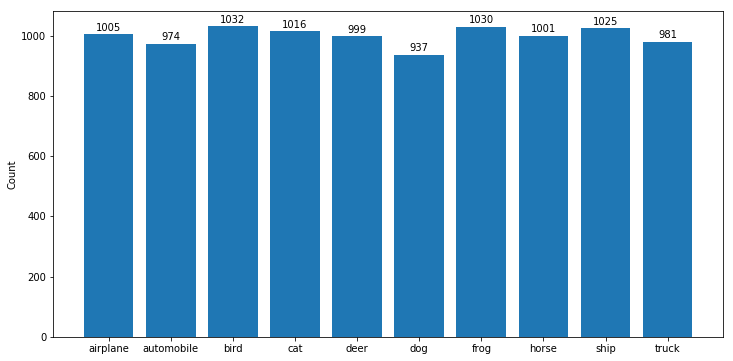

In [9]:
# Labels distribution
label_counter = collections.Counter(batch_1[b'labels'])

f, ax = plt.subplots(figsize=(12,6))
plt.bar(label_counter.keys(), label_counter.values(), tick_label=[ix2label[k] for k in label_counter.keys()]);
ax.set_ylabel('Count');

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(height),
            ha='center', va='bottom')

Classes are fairly well-balanced.

Let's see some images:

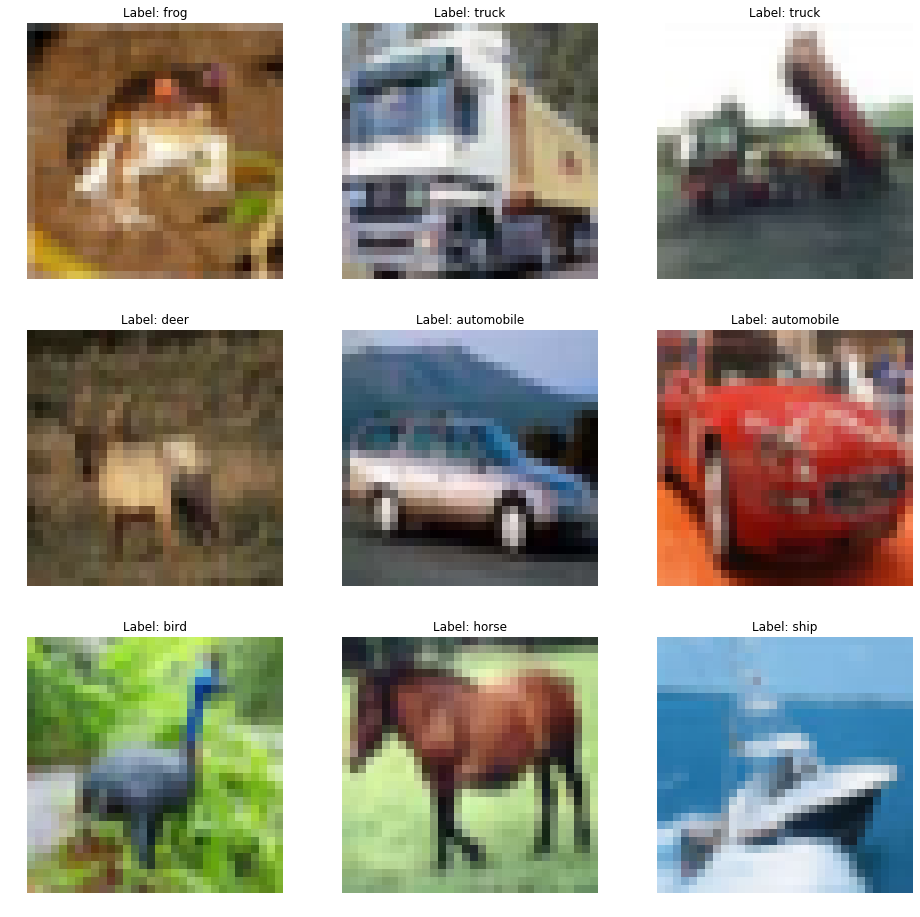

In [10]:
f, ax_arr = plt.subplots(3, 3, figsize=(16,16))

for i in range(9):
    label, ima = batch_1[b"labels"][i], reshape(batch_1[b"data"][i])
    ax_arr[i//3, i%3].imshow(ima);
    ax_arr[i//3, i%3].set_title('Label: ' + ix2label[label]);
    ax_arr[i//3, i%3].axis('off');

## Building CIFAR-3

In [11]:
default_labels = ['airplane', 'automobile', 'bird']

# Select desired classes
target_labels = default_labels
target_ixlabels = [label2ix[label] for label in target_labels]
label_map = {t: i for i, t in enumerate(target_ixlabels)}
label_map_inv = {i: t for i, t in enumerate(target_ixlabels)}

In [12]:
def process_batch(data_batch):
    new_data_batch = {
        'images': [],
        'labels': []}
    
    for i, true_label in enumerate(data_batch[b'labels']):
        if true_label not in target_ixlabels:
            continue
            
        new_data_batch['images'].append(reshape(data_batch[b"data"][i]))
        new_data_batch['labels'].append(label_map[true_label])
        
    return new_data_batch

In [13]:
cifar3_batch1 = process_batch(batch_1)

Plot some images of CIFAR-3

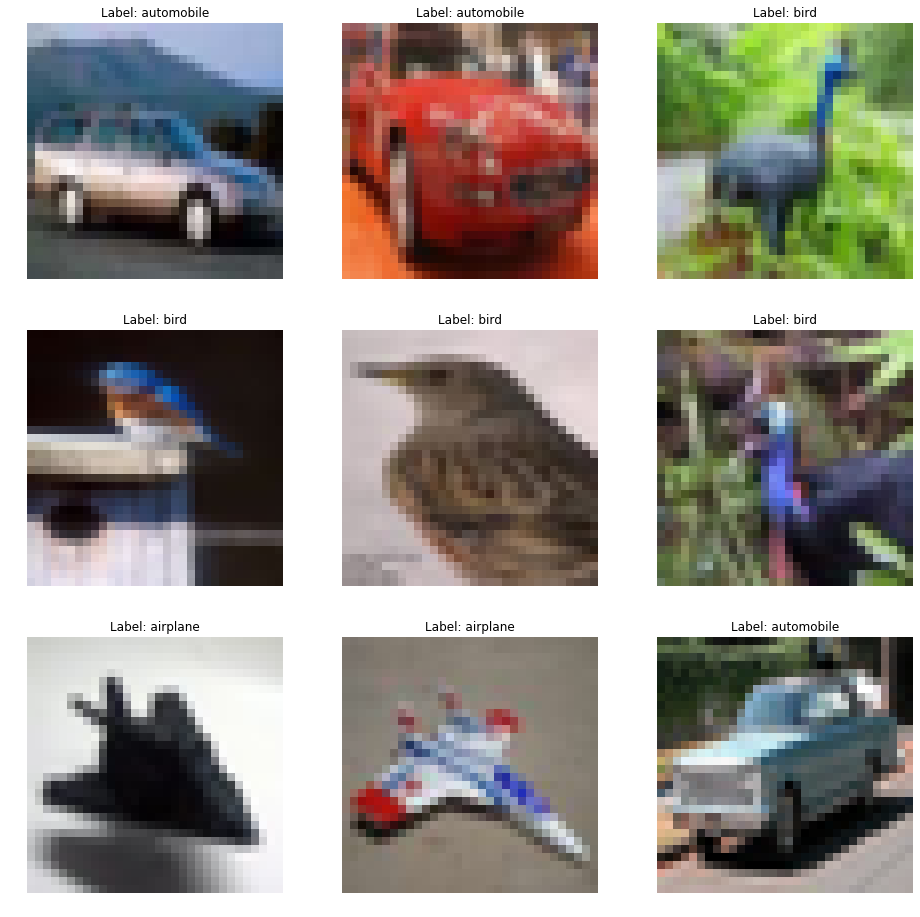

In [14]:
f, ax_arr = plt.subplots(3, 3, figsize=(16,16))

for i in range(9):
    label, ima = cifar3_batch1["labels"][i], cifar3_batch1["images"][i]
    ax_arr[i//3, i%3].imshow(ima);
    ax_arr[i//3, i%3].set_title('Label: ' + ix2label[label_map_inv[label]]);
    ax_arr[i//3, i%3].axis('off');

In [15]:
def get_train_cifar3():
    cifar3 = {
        'images': [],
        'labels': []}
    
    for batch in train_batches:
        data_batch = unpickle(os.path.join(data_path, batch))
        curr_batch = process_batch(data_batch)
        
        cifar3['images'] += curr_batch['images']
        cifar3['labels'] += curr_batch['labels']
        
    return cifar3

In [16]:
cifar3 = get_train_cifar3()

Again we can check for balance:

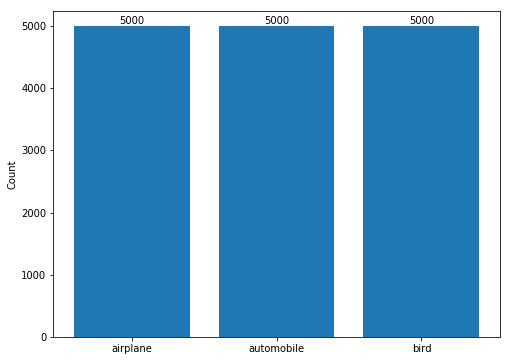

In [17]:
# Labels distribution
label_counter = collections.Counter(cifar3['labels'])

f, ax = plt.subplots(figsize=(8,6))
plt.bar(label_counter.keys(), label_counter.values(), tick_label=[ix2label[label_map_inv[k]] for k in label_counter.keys()]);
ax.set_ylabel('Count');

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(height),
            ha='center', va='bottom')